In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

print(df.head())

print(df.info())

print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Drop rows with too many missing values 
df.dropna(thresh=4, inplace=True)


In [12]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [13]:
from sklearn.preprocessing import StandardScaler

#features to scale
num_cols_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

# Preview the scaled data
print(df.head())


   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0            1         0  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1 -1.566107  0.663861  0.432793 -0.473674  0.786845   
2            3         1  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4            5         0  0.827377  0.433312 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2     False       False        True  
3     False       False        True  
4      True       False        True  


In [14]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


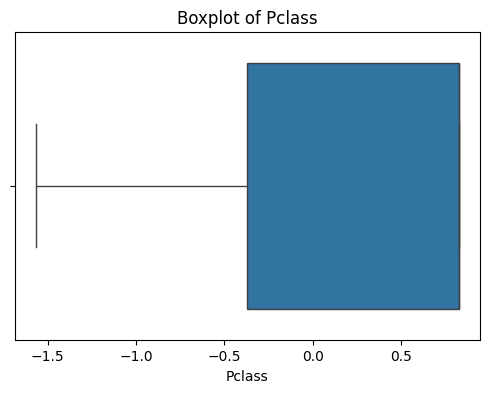

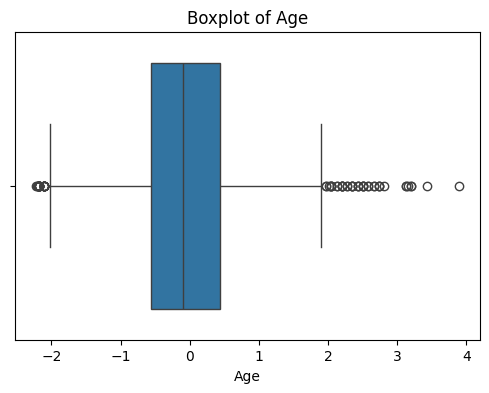

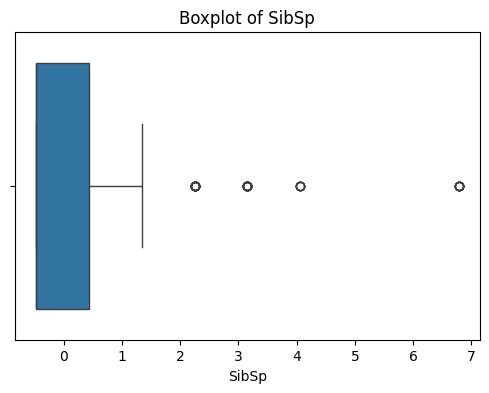

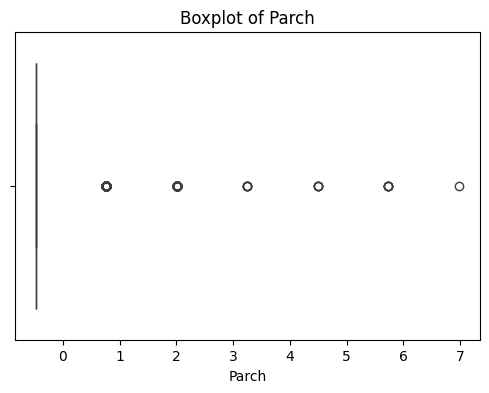

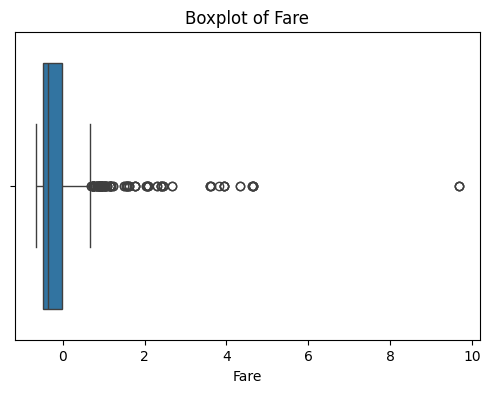

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [17]:
# Removing outliers using the IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
